# 모평균의 구간추정


**문제**


표준정규분포로부터 뽑아 95% 신뢰구간을 구하는 것을 20번 반복했을때 몇개의 신뢰구간이 모평균을 포함할지 확인

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%precision 3
np.random.seed(1111)


In [2]:
df = pd.read_csv('./csv_File/ch4_scores400.csv')
scores = np.array(df['score'])


In [3]:
# 성적데이터 모집단의 평균과 분산 계산 
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.53, 206.6691)

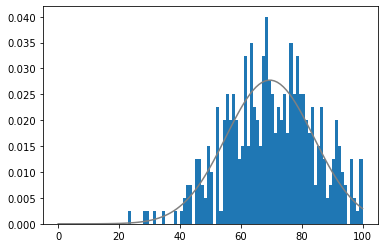

In [4]:
# 모집단의 분포 
xs = np.arange(101)
rv = stats.norm(p_mean,np.sqrt(p_var))  # rv가 정규분포임
plt.plot(xs,rv.pdf(xs),color = 'gray')   # 101개 데이터로 정규분포 그림 평균69.53,분산206.67 의 정규분포
plt.hist(scores,bins=100,range=(0,100),density=True)
plt.show()

In [5]:
# sample 데이터 생성
n_sam = 10000
n = 20
samples = np.random.choice(scores,(n_sam,n))
samples[:5]


array([[68, 75, 91, 60, 76, 70, 59, 56, 77, 54, 77, 60, 67, 86, 70, 54,
        52, 72, 57, 59],
       [97, 55, 61, 89, 80, 85, 70, 67, 77, 81, 48, 67, 56, 74, 94, 64,
        83, 65, 73, 71],
       [78, 67, 43, 63, 79, 46, 89, 79, 86, 85, 70, 57, 55, 63, 49, 83,
        83, 76, 62, 71],
       [74, 62, 48, 73, 45, 67, 58, 83, 49, 83, 67, 59, 66, 52, 54, 53,
        78, 80, 81, 57],
       [63, 83, 67, 75, 74, 73, 77, 78, 66, 86, 82, 67, 78, 54, 65, 92,
        64, 91, 61, 57]], dtype=int64)

In [6]:
rv = stats.norm()
rv.isf(0.025)

1.9599639845400545

In [7]:
rv.isf(0.975)

-1.959963984540054

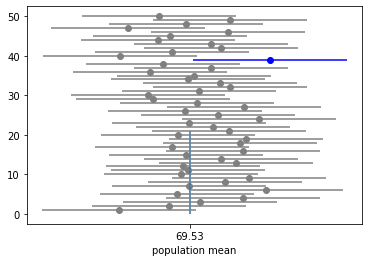

In [8]:
# 모분산을 아는 경우 95% 신뢰구간 : 정규분포를 이용 
rv = stats.norm()
n_samples = 50 
n=20
plt.vlines(p_mean,0,21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean = np.mean(sample_)
    lcl = s_mean - rv.isf(0.025) *  np.sqrt(p_var/n)
    ucl = s_mean + rv.isf(0.025) *  np.sqrt(p_var/n)
#     ucl = s_mean - rv.isf(0.975) *  np.sqrt(n_var/20) # 바로 위와 같다 
    if lcl <= p_mean <= ucl:
        plt.scatter(s_mean,n_samples-i,color = 'gray')
        plt.hlines(n_samples-i,lcl,ucl,color = 'gray')
    else:
        plt.scatter(s_mean,n_samples-i,color = 'b')
        plt.hlines(n_samples-i,lcl,ucl,color = 'b')
plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()

In [9]:
# 모분산을 모르는경우 신뢰구간 95% t-분포를 사용 
n= 20
alpha = 0.025
sample_ = samples[0]
s_mean = np.mean(sample_)
s_var = np.var(sample_)
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(alpha)  * np.sqrt(s_var/n)
ucl = s_mean + rv.isf(alpha)  * np.sqrt(s_var/n)
lcl,ucl

(61.94197882534913, 72.05802117465088)

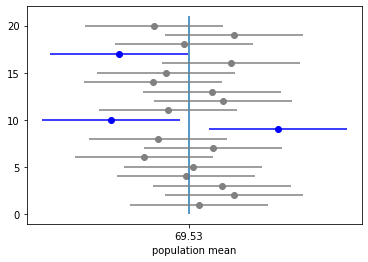

In [10]:
n_samples = 20
n = 20
rv = stats.t(df = n-1)
alpha = 0.025
plt.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean = np.mean(sample_)
    lcl = s_mean - rv.isf(alpha) * np.sqrt(s_var / n)
    ucl = s_mean + rv.isf(alpha) * np.sqrt(s_var / n)
#     ucl = s_mean - rv.isf(0.975) * np.sqrt(n_var / 20)
    if lcl <= p_mean <= ucl:
        plt.scatter(s_mean, n_samples-i, color = 'gray')
        plt.hlines(n_samples - i, lcl, ucl, color = 'gray')
    else:
        plt.scatter(s_mean, n_samples-i, color = 'b')
        plt.hlines(n_samples - i, lcl, ucl, color = 'b')

plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()


**문제 2**

만 7세 어린이 중 부모의 동의를 얻은 학생 중 10명을 표본을 로 추출 머리 둘레를 측정한 결과를 기준으로 모평균을 95% 신뢰수준에서 신뢰구간을 추정하시오 

In [11]:
# 표본 데이터  t-분포
data = [520,498,481,512,515,542,520,518,527,526]
s_mean = np.mean(data)
s_var = np.var(data)
print(s_mean,np.sqrt(s_var))
n= len(data)
print(n)
alpha = 0.025
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(alpha)  * np.sqrt(s_var/n)
ucl = s_mean + rv.isf(alpha)  * np.sqrt(s_var/n)
lcl,ucl


515.9 15.807909412695912
10


(504.59170283295526, 527.2082971670446)

In [12]:
# 정규분포 
rv = stats.norm()
lcl = s_mean - rv.isf(alpha)  * np.sqrt(s_var/n)
ucl = s_mean + rv.isf(alpha)  * np.sqrt(s_var/n)
lcl,ucl

(506.10233627489055, 525.6976637251095)

In [13]:
# 감자 무게 데이터 측정
df = pd.read_csv('./csv_File/ch11_potato.csv')
sample = np.array(df['무게'])
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [14]:
# 표본 평균 확인
s_mean = np.mean(sample)
s_mean

128.4507142857143

In [15]:
# 표본 분산 확인
s_var = np.var(sample)
s_var

14.735449489795883

In [16]:
# 모분산 = 9 
rv = stats.norm(130,np.sqrt(9/14))
rv.isf(0.95)

128.68118313069039

In [17]:
# 검정 통계량 Z
Z = (s_mean-130)/np.sqrt(9/14)
Z

-1.932298779026813

In [18]:
# 양측 검정 ,임계값 : 표준 정규분포의 95% 구간에 따라 구할 수 있음
rv = stats.norm()
rv.isf(0.95)
rv.interval(0.95)


(-1.959963984540054, 1.959963984540054)

In [19]:
# 양측검정의 p값
rv.cdf(Z)

0.026661319523126635

In [20]:
# 모분산을 아는경우  평균 모평균에 대한 양측검정을 위한 함수 
# 정규분포를 기반

def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')


In [21]:
pmean_test(sample,130,9)

귀무가설을 채택
p값은 0.053


In [22]:
# 양측검정 t-분포를 이용 
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)  # 임계값 계산 

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')


In [23]:
pmean_test(sample,130,)

귀무가설을 채택
p값은 0.169


In [24]:
t, p = stats.ttest_1samp(sample,130)
t,p # 통계량 ,p_value

(-1.4551960206404198, 0.16933464230414275)

# 대응 표본

- 근력운동 전후 집중력 비교
- 귀무가설 : 전과 후에 차이가 없다
- 대립가설 : 전과 후에 차이가 있다 


In [26]:
# 대응 표본 샘플 데이터
data = pd.read_csv('./csv_File/ch11_training_rel.csv')
print(data.shape)
data.head()

(20, 2)


,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84


In [27]:
## 기술통계
data.describe()

,전,후
count,20.000000,20.000000
mean,52.850000,58.250000
std,4.295346,11.964311
min,45.000000,37.000000
25%,50.500000,51.750000
50%,52.000000,58.500000
75%,55.500000,65.750000
max,61.000000,84.000000


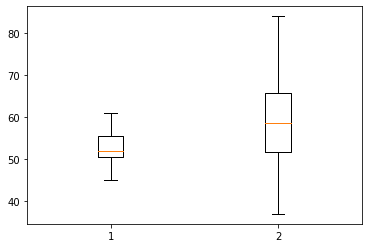

In [28]:
import matplotlib.pyplot as plt

plt.boxplot(data)
plt.show()

In [29]:
# 정규성 검정
stats.shapiro(data.전)

ShapiroResult(statistic=0.9670043587684631, pvalue=0.6907904148101807)

In [30]:
stats.shapiro(data.후)

ShapiroResult(statistic=0.9786623120307922, pvalue=0.9156785011291504)

In [31]:
diff = data.전 - data.후
diff

0     18
1    -11
2    -13
3      2
4    -25
5      8
6     -5
7     -3
8    -19
9    -18
10    -6
11    -8
12     3
13    13
14    -2
15    -6
16   -16
17   -16
18    -2
19    -2
dtype: int64

In [32]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9785391688346863, pvalue=0.9138697981834412)

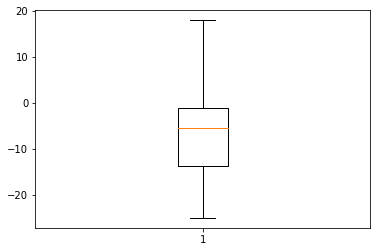

In [33]:
plt.boxplot(diff)
plt.show()

In [34]:
stats.ttest_1samp(data.전-data.후,0)

Ttest_1sampResult(statistic=-2.204154108716127, pvalue=0.04004419061842953)

=> 귀무가설을 기각하므로 , 근력운동이 집중력에 영향이 있다고 볼수있다

**예제 데이터**
- 두 학급(A,B)에 근력운동을 수행하여 집중력 테스트
- 귀무가설 : 두 학급의 집중력 차이가 없다
- 대립가설: 두 학급의 집중력 차이가 있다(양측검정)

In [36]:
data = pd.read_csv('./csv_File/ch11_training_ind.csv')
print(data.shape)
data.head()

(20, 2)


,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [37]:
data.describe()

,A,B
count,20.000000,20.000000
mean,48.750000,52.050000
std,6.711145,5.020746
min,37.000000,41.000000
25%,44.750000,49.000000
50%,48.500000,52.000000
75%,53.000000,54.250000
max,64.000000,64.000000


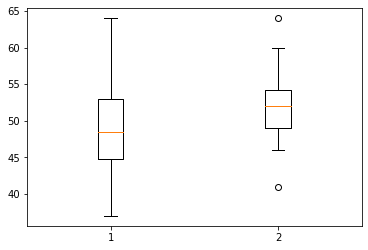

In [38]:
plt.boxplot(data)
plt.show()

In [40]:
# 정규성 검정
stats.shapiro(data.A)


ShapiroResult(statistic=0.9685941338539124, pvalue=0.7249506711959839)

In [41]:
stats.shapiro(data.B)

ShapiroResult(statistic=0.9730017781257629, pvalue=0.8165717720985413)

=> 두학급의 데이터는 모두 정규성을 만족 
- 귀무가설 : 두집단의 분산이 같다

In [42]:
stats.levene(data.A,data.B)

LeveneResult(statistic=2.061573118077718, pvalue=0.15923550057222613)

=> p값이 0.05 보다 크므로 귀무가설을 기각하지 않음, 즉 두 집단의 분산은 같다 (등분산)

In [43]:
stats.ttest_ind(data.A,data.B,equal_var = True)

Ttest_indResult(statistic=-1.7608157246524712, pvalue=0.08631600572195147)

=> 귀무가설 채택 : 두 집단의 집중력 차이가 없다 

In [44]:
stats.ttest_ind(data.A,data.B,equal_var = False)

Ttest_indResult(statistic=-1.760815724652471, pvalue=0.08695731107259361)

### 정규성을 만족하지 않는 경우
    1. 대응 표본 t-test는 윌콕슨 부호순위검정을 적용
        - stats.silcoxon(전, 후)

    2. 독립표본 t-test는 맨휘트니 U검정 적용
        - stats.mannwhitneyu(A,B ,alternative = 'two-sided')


# 카이제곱 검정
- 범주형 데이터에 대하여
- 카이제곱 분포 근거


    1. 적합도 검정: 한 표본데이터가 어떤 분포를 하는지? 
    2. 동질성 검정: 두 범주형 데이터가 동일한 분포를 하는지?
    3. 독립성 검정: 두 범주형 데이터가 서로 관련성 있는지(독립)?

In [45]:
np.random.seed(1111)


In [47]:
# 예제 데이터 
data = pd.read_csv('./csv_File/ch11_ad.csv')
print(data.shape)
data.head()

(1000, 2)


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [49]:
# 교차표 생성
cross = pd.crosstab(data.광고,data.구입)
cross 

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [52]:
# 카이제곱 독립성 검정
stats.chi2_contingency(cross, correction = False)


(3.75,
 0.052807511416113395,
 1,
 array([[360.,  40.],
        [540.,  60.]]))

In [53]:
stat,p,df,exp_tab = stats.chi2_contingency(cross, correction = False)

In [54]:
stat

3.75

In [55]:
p

0.052807511416113395

In [56]:
df

1

In [57]:
exp_tab

array([[360.,  40.],
       [540.,  60.]])